In [2]:
# import necessary things.
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# We want to see the list of all the attributes and methods of digits object.
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

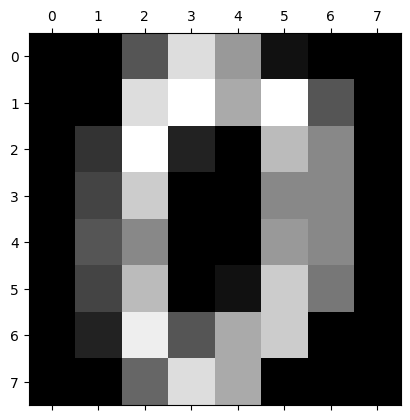

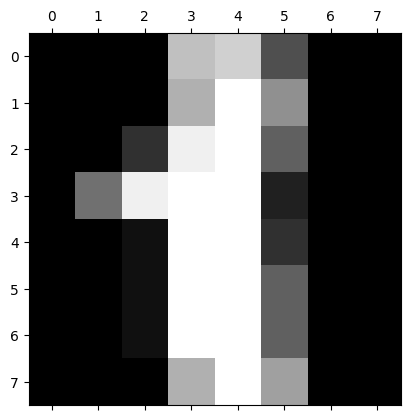

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
  plt.matshow(digits.images[i])

In [6]:
# Create a dataframe.
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
# Create a new column in dataframe.
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
# Use train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size = 0.2)

In [13]:
# Ensemble is a term used when we are using multiple algorithms in order to predict outcome. here we are using multiple decision trees.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() # we can use random trees by using n_estimator attribute within the random forest classifier. It is not
# necessary but we can give. RandomForestClassifier(n_estimators = 20) -> like this.
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
model.score(X_test, y_test)

0.9694444444444444

In [15]:
# Confusion matrix.
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1, 31]])

Text(95.72222222222221, 0.5, 'Truth')

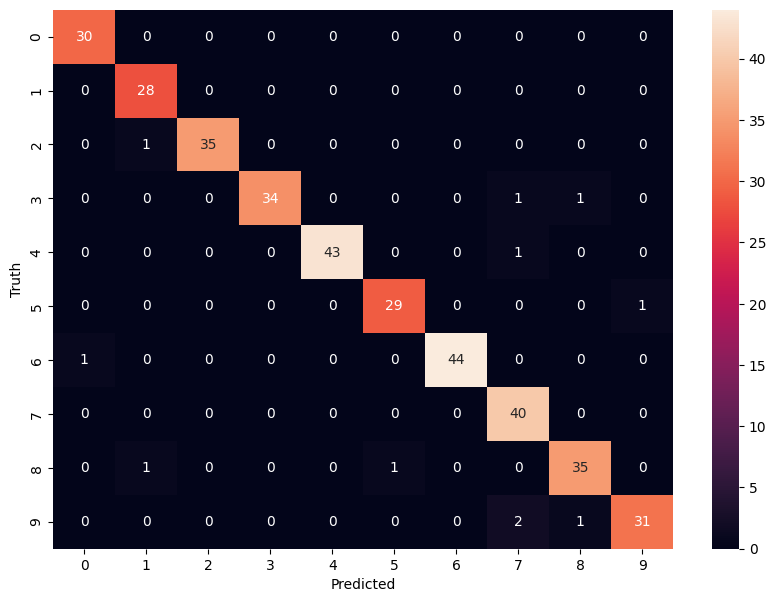

In [18]:
# better visualization using searborn.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# Exercise.
"""
Use iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
    1. Measure prediction score using default n_estimator(10)
    2. Now fine tune your model by changing the number of trees in your classifier and tell me what is the best score you can get
    using how many trees.

"""

'\nUse iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.\n    1. Measure prediction score using default n_estimator(10)\n    2. Now fine tune your model by changing the number of trees in your classifier and tell me what is the best score you can get \n    using how many trees.\n\n'